# Wrangle and Analyze Data Project Details 
1. `wrangle_act.ipynb`: code for gathering, assessing, cleaning, analyzing, and visualizing data
2. `wrangle_report.pdf` or `wrangle_report.html`: `300-600` word documentation for data wrangling steps: gather, assess, and clean 
2. `act_report.pdf` or `act_report.html`: `250` word minimum documentation of analysis and insights into final data
3. `twitter_archive_enhanced.csv`: file as given
4. `image_predictions.tsv`: file downloaded programmatically
5. `tweet_json.txt`: file constructed via API
6. `twitter_archive_master.csv`: combined and cleaned data
7. any additional files
8. At least three `3` insights and one `1` visualization must be assessed. 


## Part I: Gather

In [1]:
import pandas as pd
import requests
import os
import logging
import sys
import json
import datetime
import numpy as np
Logger = None

#### OS, File I/O, Requests

In [3]:
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

#### Twitter API, Tweepy, File I/O 

1. Query all of the tweet IDs in the WeRateDogs Twitter archive, printing out each tweet ID after it was queried.
2. Set the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class.
3. Tweet data is stored in JSON format by Twitter. 
4. Set the tweet_mode parameter to 'extended' in the get_status call, i.e., api.get_status(tweet_id, tweet_mode='extended').
- You only want original ratings (no retweets) that have images. 
- Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

In [21]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'API_KEY'
consumer_secret = 'SECRET'
access_token = 'TOKEN'
access_secret = 'SECRET'
    
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Got thru!")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Did not get thru.")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
with open('tweet_json.txt') as file:
    tweet_json_list = []
    for line in file:
        tweet_json_list.append(json.loads(line)) # cite 1

In [4]:
tweet_json_list[7]

{'created_at': 'Fri Jul 28 00:22:40 +0000 2017',
 'id': 890729181411237888,
 'id_str': '890729181411237888',
 'full_text': "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 'truncated': False,
 'display_text_range': [0, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 890729118844600320,
    'id_str': '890729118844600320',
    'indices': [119, 142],
    'media_url': 'http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'url': 'https://t.co/v0nONBcwxq',
    'display_url': 'pic.twitter.com/v0nONBcwxq',
    'expanded_url': 'https://twitter.com/dog_rates/status/890729181411237888/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1200, 'h': 1328, 'resize': 'fit'},
     'medium': {'w': 1084, 'h': 1200,

In [5]:
df_json = pd.DataFrame.from_records(tweet_json_list)

#### Pandas read_csv and tsv

In [6]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
df_tsv = pd.read_csv('tweet_image_predictions/image-predictions.tsv', sep='\t', header=0, encoding='utf-8')

## Part II: Assess

- Assess and clean at least **eight `8` quality issues** and **two `2` tidiness issues** in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. 
- You do not need to gather the tweets beyond August 1st, 2017. 
- You only want ratings (no retweets) that have images from JSON Twitter API data
- Image prediction scores are in `tsv` for each dog and T/F confirms prediction accurate or not
- Dog stages are: `doggo` (big pupper and older), `floofer` (any dog with +fur), `pupper` (small doggo and younger), `puppo` (transition between pupper and doggo)

In [8]:
df_archive.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None


In [9]:
df_tsv.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1120,726828223124897792,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,1,miniature_pinscher,0.255327,True,Border_terrier,0.181279,True,Labrador_retriever,0.125185,True
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True


In [10]:
df_json.sample(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
528,None,None,Mon Dec 05 17:31:15 +0000 2016,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 805826823359631360, 'id_str'...",6896,False,This is Duke. He is not a fan of the pupporazz...,None,...,NaN,NaN,NaN,NaN,1936,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [11]:
df_json.info() # only want ratings (not retweets) with url image

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [12]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality

**twitter-archive-enhanced.csv**: 
1. `NaN` values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`
2. `None` values in `name`,  `doggo`, `floofer`, `pupper`, `puppo`
3. Single letters in `name`

**tweet_json.txt**: 
4.  `None` values in `contributors`, `coordinates`, `geo`
5. `NaN` values in `extended_entities`, `quoted_status`, `quoted_status_id`, `quoted_status_id_str`, `quoted_status_permalink`, `retweeted_status`
6. remame `id_str` to `tweet_id` for merging dataframes

**image-predictions.tsv**
7. `p1, p2, p3` have both upper and lower case strings 
8. `p1, p2, p3` have `_` between name
9. `p1, p2, p3` have non-dog names

### Tidiness


- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

1. `image-predictions.tsv` columns names need to be renamed to show prediction outcome
2. all three `json`, `tsv`, `txt` DataFrames need to be merged to combine only important data joining on `tweet_id`

## Part III: Clean

In [14]:
archive_clean = df_archive.copy()
json_clean = df_json.copy()
tsv_clean = df_tsv.copy()

In [15]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
json_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [17]:
tsv_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### drop columns, drop null values, convert to timestamp, ignore lower case names

In [18]:
archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'text', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], inplace=True)

In [19]:
json_clean.drop(columns=['contributors', 'coordinates', 'display_text_range', 'entities', 'extended_entities', 'favorited', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable','quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'], inplace=True)

In [20]:
tsv_clean.drop(columns=['img_num', 'p1_conf', 'p2_conf', 'p3_conf'], inplace=True)

In [21]:
archive_clean.replace(['None'], np.nan, inplace = True) # replace None with NaN in order to dropna truthy 
archive_clean.drop(archive_clean[  (archive_clean['name'].str.len() <=3 )].index, inplace=True) # drop names <=3 

In [22]:
archive_clean.isnull().sum()

tweet_id                 0
source                   0
rating_numerator         0
rating_denominator       0
name                   745
doggo                 2084
floofer               2169
pupper                1940
puppo                 2147
dtype: int64

In [23]:
archive_clean['name'].replace('such','NaN',inplace=True) # edge case
archive_clean['name'].replace('quite','NaN',inplace=True) # edge case 

In [24]:
archive_clean.shape, json_clean.shape, tsv_clean.shape

((2177, 9), (2333, 5), (2075, 8))

In [25]:
json_clean['created_at'] = pd.to_datetime(json_clean['created_at'])

In [26]:
json_clean['created_at'] = json_clean['created_at'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "") # cite 2

#### rename columns

In [27]:
json_clean = json_clean.rename(columns={"id": "tweet_id", "created_at": "timestamp"})

In [28]:
archive_clean = archive_clean.rename(columns={"name": "dog_name"})

In [29]:
tsv_clean = tsv_clean.rename(columns={"p1": "first_dog_prediction", "p1_dog": "first_prediction_outcome", \
                         "p2": "second_dog_prediction", "p2_dog": "second_prediction_outcome", \
                          "p3": "third_dog_prediction", "p3_dog": "third_prediction_outcome"})

#### string function replace and title

In [30]:
tsv_clean['first_dog_prediction'] = tsv_clean['first_dog_prediction'].astype(str).replace(to_replace ='_', value = ' ', regex = True) 
tsv_clean['first_dog_prediction'] = tsv_clean['first_dog_prediction'].astype(str).str.title()

tsv_clean['second_dog_prediction'] = tsv_clean['second_dog_prediction'].astype(str).replace(to_replace ='_', value = ' ', regex = True) 
tsv_clean['second_dog_prediction'] = tsv_clean['second_dog_prediction'].astype(str).str.title()

tsv_clean['third_dog_prediction'] = tsv_clean['third_dog_prediction'].astype(str).replace(to_replace ='_', value = ' ', regex = True) 
tsv_clean['third_dog_prediction'] = tsv_clean['third_dog_prediction'].astype(str).str.title()

In [31]:
tsv_clean.tweet_id.dtype, json_clean.tweet_id.dtype, archive_clean.tweet_id.dtype # check join key same type 

(dtype('int64'), dtype('int64'), dtype('int64'))

In [44]:
# clean ratings: df['rating_numerator'] = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True) #regex extracting
# # cite: https://knowledge.udacity.com/questions/49748

# replace column names with nan: 
# mask1 = twitter_clean.name.str.isupper()
# mask2 = df_1_clean.name.str.islower()
# column_name = 'name'
# df_clean.loc[(mask1 | mask2), column_name] = np.nan 
# # cite: https://knowledge.udacity.com/questions/45647

#### Merge DataFrames

In [45]:
json_clean.columns, tsv_clean.columns, archive_clean.columns

(Index(['timestamp', 'favorite_count', 'full_text', 'tweet_id',
        'retweet_count'],
       dtype='object'), Index(['tweet_id', 'jpg_url', 'first_dog_prediction',
        'first_prediction_outcome', 'second_dog_prediction',
        'second_prediction_outcome', 'third_dog_prediction',
        'third_prediction_outcome'],
       dtype='object'), Index(['tweet_id', 'source', 'rating_numerator', 'rating_denominator',
        'dog_name', 'doggo', 'floofer', 'pupper', 'puppo'],
       dtype='object'))

In [46]:
from functools import reduce
dfs = [json_clean, tsv_clean, archive_clean]
master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs) # cite 3

In [47]:
master.sample(1)

,timestamp,favorite_count,full_text,tweet_id,retweet_count,jpg_url,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,source,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
1873,20151117 01:02 AM,309,*internally screaming* 12/10 https://t.co/YMcr...,666421158376562688,110,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,Blenheim Spaniel,True,Cocker Spaniel,True,Shih-Tzu,True,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,NaN,NaN,NaN,NaN


In [48]:
master.columns

Index(['timestamp', 'favorite_count', 'full_text', 'tweet_id', 'retweet_count',
       'jpg_url', 'first_dog_prediction', 'first_prediction_outcome',
       'second_dog_prediction', 'second_prediction_outcome',
       'third_dog_prediction', 'third_prediction_outcome', 'source',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

In [50]:
master.reindex(columns=['timestamp', 'tweet_id', 'full_text', 'jpg_url', 'source', 'dog_name', 
        'favorite_count', 'retweet_count', 'rating_numerator', 'rating_denominator',
       'first_dog_prediction', 'first_prediction_outcome','second_dog_prediction', 'second_prediction_outcome',
       'third_dog_prediction', 'third_prediction_outcome', 'doggo', 'floofer', 'pupper', 'puppo'])

,timestamp,tweet_id,full_text,jpg_url,source,dog_name,favorite_count,retweet_count,rating_numerator,rating_denominator,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,doggo,floofer,pupper,puppo
0,20170801 04:23 PM,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,37274,7983,13,10,Orange,False,Bagel,False,Banana,False,NaN,NaN,NaN,NaN
1,20170801 12:17 AM,892177421306343426,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,32047,5928,13,10,Chihuahua,True,Pekinese,True,Papillon,True,NaN,NaN,NaN,NaN
2,20170731 12:18 AM,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Archie,24147,3915,12,10,Chihuahua,True,Malamute,True,Kelpie,True,NaN,NaN,NaN,NaN
3,20170730 03:58 PM,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Darla,40588,8129,13,10,Paper Towel,False,Labrador Retriever,True,Spatula,False,NaN,NaN,NaN,NaN
4,20170729 04:00 PM,891327558926688256,This is Franklin. He would like you to stop ca...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,38826,8813,12,10,Basset,True,English Springer,True,German Short-Haired Pointer,True,NaN,NaN,NaN,NaN
5,20170729 12:08 AM,891087950875897856,Here we have a majestic great white breaching ...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,19501,2931,13,10,Chesapeake Bay Retriever,True,Irish Terrier,True,Indian Elephant,False,NaN,NaN,NaN,NaN
6,20170728 12:22 AM,890729181411237888,When you watch your owner call another dog a g...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,62862,17788,13,10,Pomeranian,True,Eskimo Dog,True,Pembroke,True,NaN,NaN,NaN,NaN
7,20170727 04:25 PM,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Zoey,26842,4033,13,10,Irish Terrier,True,Irish Setter,True,Chesapeake Bay Retriever,True,NaN,NaN,NaN,NaN
8,20170726 03:59 PM,890240255349198849,This is Cassie. She is a college pup. Studying...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Cassie,30741,6949,14,10,Pembroke,True,Cardigan,True,Chihuahua,True,doggo,NaN,NaN,NaN
9,20170726 12:31 AM,890006608113172480,This is Koda. He is a South Australian decksha...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Koda,29576,6905,13,10,Samoyed,True,Pomeranian,True,Chow,True,NaN,NaN,NaN,NaN


## Part IV: Analyze and Store

#### sqlalchemy and sqlite 

In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///tweets.db')

In [48]:
master.to_sql('new', engine, index=False)

In [49]:
tweets = pd.read_sql('SELECT * FROM new', engine)

In [51]:
tweets.head(1)

,timestamp,favorite_count,full_text,tweet_id,retweet_count,jpg_url,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,source,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,20170801 04:23 PM,37274,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,7983,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0,Bagel,0,Banana,0,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,None,None,None,None
1,20170801 12:17 AM,32047,This is Tilly. She's just checking pup on you....,892177421306343426,5928,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,1,Pekinese,1,Papillon,1,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,None,None,None,None
2,20170731 12:18 AM,24147,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,3915,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,1,Malamute,1,Kelpie,1,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,None,None,None,None


#### seaborn, matplotlib

In [51]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
py.sign_in("IPython.Demo", "1fw3zw2o13")

In [52]:
import plotly
plotly.__version__

'3.10.0'

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)

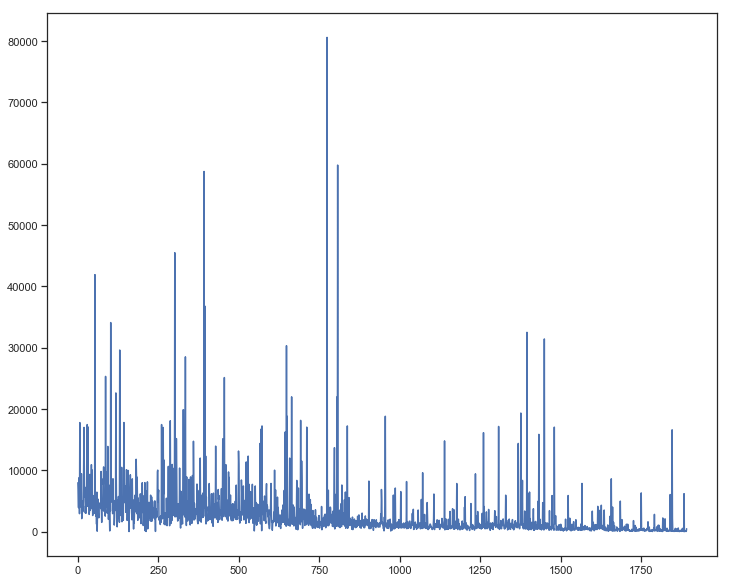

In [58]:
plt.figure(figsize=(12,10))
plt.plot(master.retweet_count)

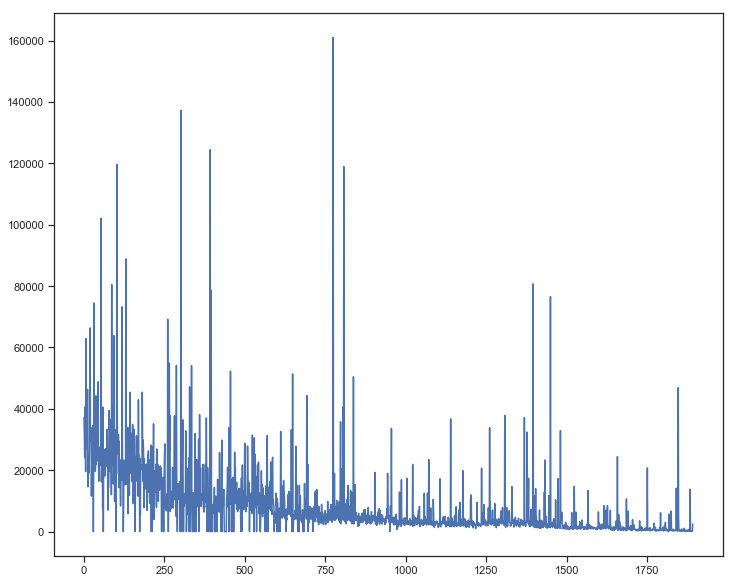

In [59]:
plt.figure(figsize=(12,10))
plt.plot(master.favorite_count)

In [60]:
from IPython.display import Image
Image(url='https://placeholder.com')

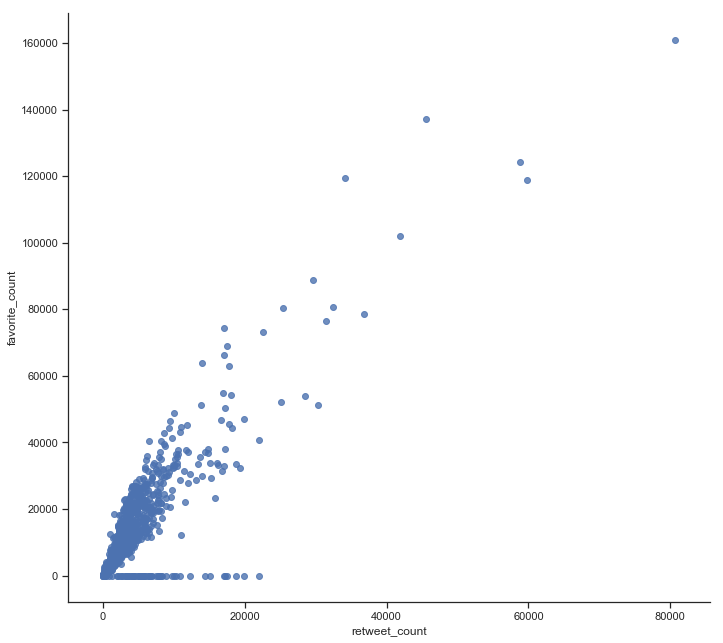

In [61]:
g=sns.lmplot('retweet_count', 'favorite_count', data=master, fit_reg=False)
g.fig.set_size_inches(12, 10)

##### we are seeing the percentage of first prediction outcomes, "True" wins with 73.5%

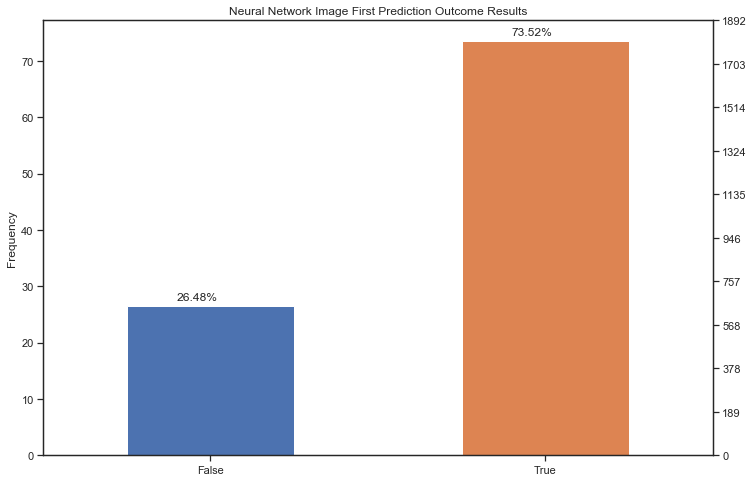

In [112]:
plt.figure(figsize=(12,8))
plt.title('Neural Network Image First Prediction Outcome Results')  
plt.ylabel('Frequency')

ax = (master.first_prediction_outcome.value_counts()/len(master)*100).sort_index().plot(kind="bar", rot=0) # cite 9
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(master)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

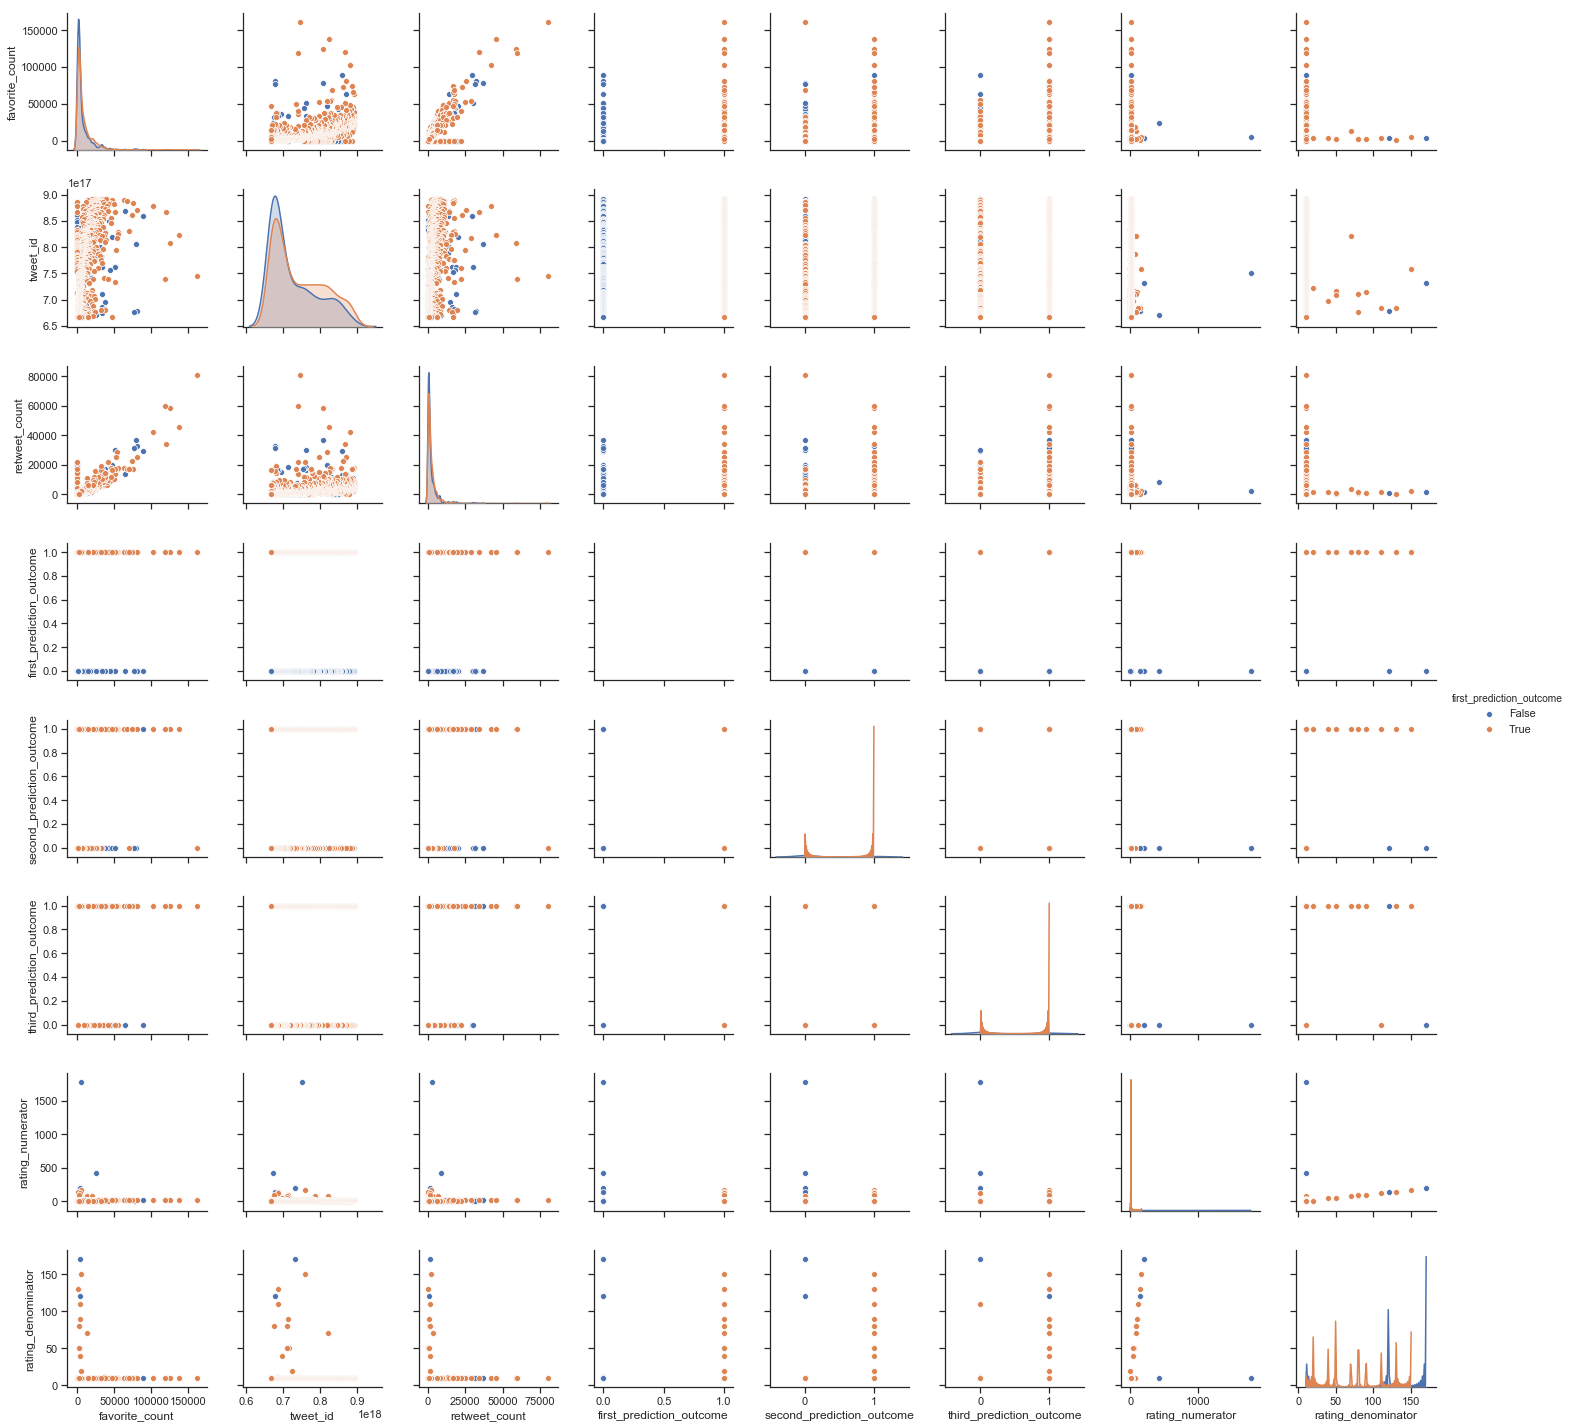

In [109]:
sns.pairplot(master, hue="first_prediction_outcome", height=2.5); # cite 8

> #### bar charts to show first, second and third prediction outcomes, again "True" has consistently occured at least 1350 times each prediction! 

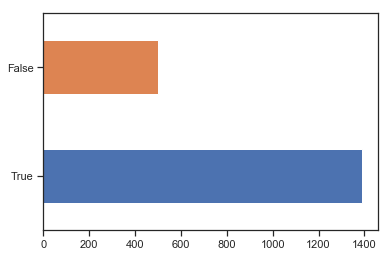

In [103]:
master['first_prediction_outcome'].value_counts().plot(kind='barh')

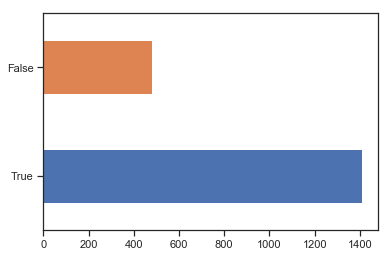

In [104]:
master['second_prediction_outcome'].value_counts().plot(kind='barh')

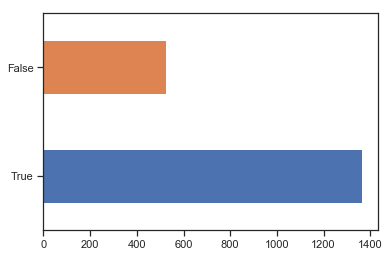

In [105]:
master['third_prediction_outcome'].value_counts().plot(kind='barh')

In [115]:
a = master['first_prediction_outcome'].value_counts()
b = master['second_prediction_outcome'].value_counts()
c = master['third_prediction_outcome'].value_counts()
print(a,'\n','\n', b,'\n','\n', c,'\n')

True     1391
False     501
Name: first_prediction_outcome, dtype: int64 
 
 True     1411
False     481
Name: second_prediction_outcome, dtype: int64 
 
 True     1366
False     526
Name: third_prediction_outcome, dtype: int64 



In [107]:
master.sample(1)

,timestamp,favorite_count,full_text,tweet_id,retweet_count,jpg_url,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,source,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
1163,20160128 09:54 PM,2952,This pupper just descended from heaven. 12/10 ...,692828166163931137,904,https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg,Samoyed,True,Arctic Fox,False,White Wolf,False,"<a href=""http://twitter.com/download/iphone"" r...",12,10,NaN,NaN,NaN,pupper,NaN


> #### gathered a text file of all dog breed names, which we will compare against prediction in archive_clean!

In [247]:
dog_breeds = pd.read_csv('breeds.txt', engine='python', doublequote=False, header=None)
dog_breeds # cite 5

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,'Blue Lacy','Queensland Heeler','Rhod Ridgeback','Retriever','Chinese Sharpei','Black Mouth Cur','Catahoula','Staffordshire','Affenpinscher','Afghan Hound',...,'Weimaraner','Welsh Springer Spaniel','Welsh Terrier','West Highland White Terrier','Whippet','Wire Fox Terrier','Wirehaired Pointing Griffon','Wirehaired Vizsla','Xoloitzcuintli','Yorkshire Terrier'


> #### we are now getting all unique predicted "names" which are dog and non-dog names in the archive dataframe, to then merge and convert them to a set, from there we can see if these "names" are officially dog breed names!

In [248]:
d = master['first_dog_prediction'].unique().tolist()
e = master['second_dog_prediction'].unique().tolist()
f = master['third_dog_prediction'].unique().tolist()
dog_names = set( d + e + f )
dog_names   # predicted dog names with non-dog names 

{'Abaya',
 'Academic Gown',
 'Accordion',
 'Acorn',
 'Acorn Squash',
 'Affenpinscher',
 'Afghan Hound',
 'African Chameleon',
 'African Crocodile',
 'African Grey',
 'African Hunting Dog',
 'Agama',
 'Airedale',
 'Alp',
 'American Alligator',
 'American Black Bear',
 'American Staffordshire Terrier',
 'Angora',
 'Appenzeller',
 'Arabian Camel',
 'Arctic Fox',
 'Armadillo',
 'Ashcan',
 'Assault Rifle',
 'Australian Terrier',
 'Axolotl',
 'Badger',
 'Bagel',
 'Bakery',
 'Balance Beam',
 'Bald Eagle',
 'Balloon',
 'Ballplayer',
 'Banana',
 'Band Aid',
 'Banded Gecko',
 'Bannister',
 'Barbell',
 'Barber Chair',
 'Barbershop',
 'Barracouta',
 'Barrel',
 'Barrow',
 'Basenji',
 'Basketball',
 'Basset',
 'Bassinet',
 'Bath Towel',
 'Bathing Cap',
 'Bathtub',
 'Beach Wagon',
 'Beacon',
 'Beagle',
 'Bearskin',
 'Beaver',
 'Bedlington Terrier',
 'Bee Eater',
 'Bell Cote',
 'Bernese Mountain Dog',
 'Bib',
 'Bighorn',
 'Binder',
 'Binoculars',
 'Birdhouse',
 'Bison',
 'Black Swan',
 'Black Widow',


In [249]:
breed_names = []
result = dog_breeds.loc[0, :].values.tolist()

for breed in result:
    remove_quote = breed.replace("'", "")
    breed_names.append(no_quote) 

> #### we see below all of the official dog breed names that were found in the archive dataframe which means all remaining "names" could be researched further to determine if they are "new" breeds not on the list or not dog breed names at all!

In [251]:
[i for i in breed_names if i in dog_names]  # breed_names are dog breeds from external source and dog_names is predicted names

['Affenpinscher',
 'Afghan Hound',
 'American Staffordshire Terrier',
 'Australian Terrier',
 'Basenji',
 'Beagle',
 'Bedlington Terrier',
 'Bernese Mountain Dog',
 'Bloodhound',
 'Border Collie',
 'Border Terrier',
 'Borzoi',
 'Boxer',
 'Briard',
 'Chesapeake Bay Retriever',
 'Chihuahua',
 'Cocker Spaniel',
 'Collie',
 'Curly-Coated Retriever',
 'Dalmatian',
 'English Foxhound',
 'English Setter',
 'Flat-Coated Retriever',
 'French Bulldog',
 'German Shepherd',
 'Giant Schnauzer',
 'Golden Retriever',
 'Gordon Setter',
 'Great Dane',
 'Great Pyrenees',
 'Greater Swiss Mountain Dog',
 'Ibizan Hound',
 'Irish Setter',
 'Irish Terrier',
 'Irish Water Spaniel',
 'Irish Wolfhound',
 'Italian Greyhound',
 'Keeshond',
 'Kerry Blue Terrier',
 'Komondor',
 'Kuvasz',
 'Labrador Retriever',
 'Lakeland Terrier',
 'Miniature Pinscher',
 'Miniature Schnauzer',
 'Newfoundland',
 'Norfolk Terrier',
 'Norwegian Elkhound',
 'Norwich Terrier',
 'Old English Sheepdog',
 'Otterhound',
 'Papillon',
 'Pomer

In [262]:
data = {'date': master['timestamp'], 'likes': master['favorite_count']}
date_likes = pd.DataFrame(data, columns = ['date', 'likes'])
date_likes.head()

,date,likes
0,20170801 04:23 PM,37274
1,20170801 12:17 AM,32047
2,20170731 12:18 AM,24147
3,20170730 03:58 PM,40588
4,20170729 04:00 PM,38826


In [263]:
date_likes['date'] = pd.to_datetime(date_likes['date']) # cite 4
date_likes.index = date_likes['date']
del date_likes['date']

> #### here we are finally doing a "time-series" on how many tweets occured per day! It seems we had a lot of action the second to third week in June 2016!

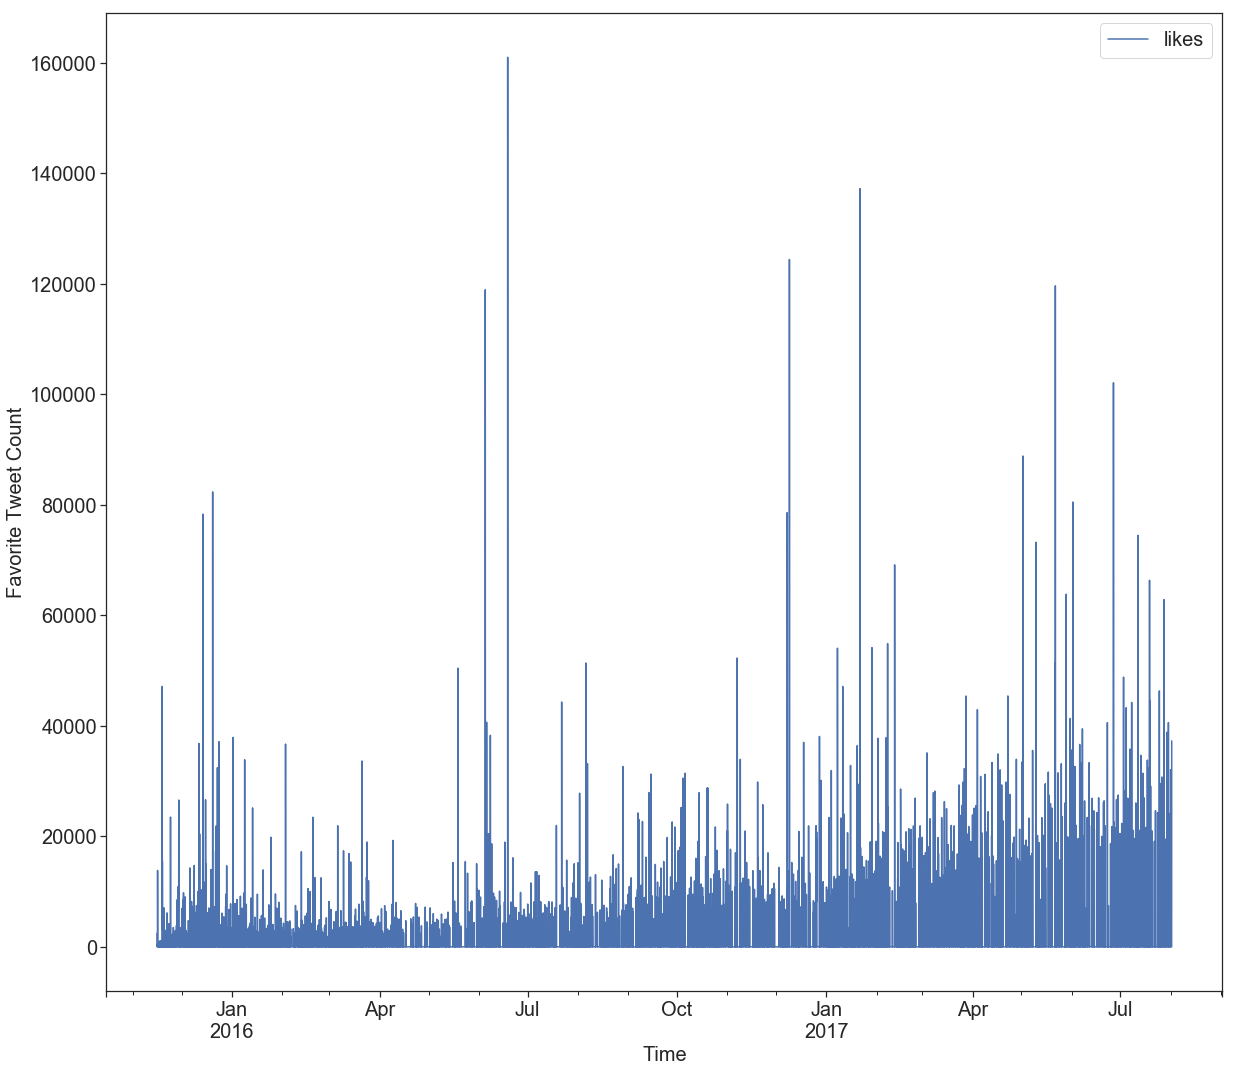

In [260]:
date_likes.resample('D').sum().plot(figsize=(20, 18), fontsize=20 ) 
plt.xlabel('Time', fontsize=20);
plt.ylabel('Favorite Tweet Count', fontsize=20);
plt.legend(loc='best', fontsize=20)
plt.show()

In [255]:
retweets_sorted = master.sort_values(by='retweet_count', ascending=False)
rtw = retweets_sorted.reset_index(drop=True)
print('Mean retweets:', round(rtw['retweet_count'].mean(),2), '\n')  # cite 6

Mean retweets: 2698.1 



> #### thanks to this site: https://www.kdnuggets.com/2017/03/beginners-guide-tweet-analytics-pandas.html I found great code to determine top retweets and favorite counted tweets in a dataframe! It looks like "doggo"'s and "puppo"'s are popular!

In [256]:
# top 5 retweeted tweets' 
for i in range(5):
    print(rtw['full_text'].iloc[i], '-', rtw['retweet_count'].iloc[i])
print('\n')  # cite 6

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4 - 80602
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC - 59780
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d - 58738
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc - 45493
This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY - 41914




In [257]:
favorites_sorted = master.sort_values(by='favorite_count', ascending=False)
ftw = favorites_sorted.reset_index(drop=True)
print('Mean favorites:', round(ftw['favorite_count'].mean(),2), '\n')  # cite 6

Mean favorites: 8303.44 



In [258]:
# top 5 favorited tweets' 
for i in range(5):
    print(ftw['full_text'].iloc[i], '-', ftw['favorite_count'].iloc[i])
print('\n')  # cite 6

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4 - 161010
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc - 137238
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d - 124414
This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr - 119639
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC - 118925




> #### The Counter built in function of Python's collections library is amazing, as it shows with the help of the most_common function how many words in our tweets were most used. We can see basic "is", "this", of course are used widely, but, also, we found "pupper" is up there too! Taking this further we can look into NLP methods, for another time!

In [259]:
import collections
print(collections.Counter(" ".join(master["full_text"]).split()).most_common(100)) # cite 7

[('is', 1286), ('This', 1087), ('a', 960), ('to', 607), ('the', 558), ("He's", 446), ('12/10', 434), ('He', 423), ('would', 382), ('11/10', 382), ('10/10', 379), ('for', 321), ('of', 296), ('in', 284), ('13/10', 254), ('and', 223), ('his', 214), ('Meet', 201), ('just', 164), ('this', 164), ('on', 163), ('be', 163), ('with', 158), ('pet', 150), ('you', 148), ('pupper', 146), ('She', 145), ("She's", 143), ('I', 142), ('af', 135), ('af.', 132), ('but', 130), ('9/10', 125), ('dog', 117), ('he', 113), ('that', 112), ('at', 109), ('an', 108), ('your', 104), ('her', 103), ('good', 97), ('it', 97), ('all', 97), ('very', 94), ('like', 93), ('not', 92), ('hello', 92), ('as', 91), ('was', 90), ('only', 89), ('Say', 89), ('pup', 88), ('8/10', 82), ('has', 81), ('h*ckin', 76), ('RT', 72), ('have', 71), ('here.', 71), ('him', 70), ('so', 70), ('dogs.', 70), ('Very', 69), ('by', 68), ('rate', 67), ('are', 67), ('still', 67), ('one', 66), ('out', 63), ('We', 59), ('from', 58), ("he's", 58), ('dog.', 5

> Citations:
1. https://stackoverflow.com/questions/47889565/reading-json-objects-from-text-file-into-pandas
2. https://stackoverflow.com/questions/35488036/using-lambda-and-strftime-on-dates-when-there-are-null-values-pandas
3. https://stackoverflow.com/questions/49127961/python-pandas-can-not-merge-dataframe-with-instance-of-type-class-str
4. https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/
5. https://www.kaggle.com/andraszsom/dog-breeds-dog-groups
6. https://www.kdnuggets.com/2017/03/beginners-guide-tweet-analytics-pandas.html
7. https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas
8. https://seaborn.pydata.org/tutorial/axis_grids.html
9. https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
10. https://stackoverflow.com/questions/28376538/removing-quotation-marks-from-list-items